# ¡Hola Fernando! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class='alert alert-block alert-success'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class='alert alert-block alert-warning'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class='alert alert-block alert-danger'>

<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class='alert alert-block alert-info'>
<b>Respuesta estudiante.</b> <a class='tocSkip'></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión v1 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

¡Excelente trabajo Fernando! Completaste correctamente todas las tareas del notebook y aplicaste muy bien los conocimientos de analítica. Se nota que dominas los conceptos y los pusiste en práctica con claridad. No tengo observaciones que corregir, tu proyecto está aprobado. ¡Felicitaciones por lograrlo en la primera revisión! Te deseo mucho éxito en el próximo sprint.

Saludos.

</div>

----

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar los archivos
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')

# Revisar primeras filas
print(df_companies.head())
print(df_neighborhoods.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Muy bien al mostrar parte de la data, pero si quieres mostrar las primeras filas del dataframe con `df.head()`, no te recomiendo usar `print(df.head())`, sino que tan solo escribir `df.head()` en la celda. En los notebook jupyter, cuando se llama solamente a una variable o función, el output de la celda mostrará el resultado de aquello. Si usas `print(df.head())`, el output será un texto de las primeras filas del dataframe. Sin embargo, si solo pones `df.head()`, el output serán las mismas filas, pero con un mejor formato, que lo hace más legible. Te recomiendo que lo pruebes.


Por ejemplo, con `print(df.head())` se obtiene


>                           company_name  trips_amount
>     0                        Flash Cab         19558
>     1        Taxi Affiliation Services         11422
>     2                Medallion Leasing         10367
>     3                       Yellow Cab          9888
>     4  Taxi Affiliation Service Yellow          9299



Pero al usar solo `df.head()` el output de la celda será así:

>  | company_name                        | trips_amount |
>  |------------------------------------|--------------|
>  | Flash Cab                          | 19558        |
>  | Taxi Affiliation Services          | 11422        |
>  | Medallion Leasing                  | 10367        |
>  | Yellow Cab                         | 9888         |
>  | Taxi Affiliation Service Yellow    | 9299         |



Otra opción es usar `display()` para mostrar un dataframe, da un formato igual que solo poner `df.head()` en la celda, con la ventaja de que puedes llamarlo varias veces en una misma celda y mostrar varios dataframes si lo deseas. Por ejemplo, en vez de usar `print(df.head())`, usa `display(df.head())`.

</div>

In [2]:
print(df_companies.info())
print(df_neighborhoods.info())

# Verificar si hay nulos o duplicados
print(df_companies.isna().sum())
print(df_neighborhoods.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
company_name    0
trips_amount    0
dtype: int64
dropoff_location_name    0
average_trips            0
dtype: int64


#### average_trips viene como string, hay que convertirlo:

In [3]:
df_neighborhoods['average_trips'] = pd.to_numeric(df_neighborhoods['average_trips'], errors='coerce')

In [4]:
# Ubicamos los 10 principales barrios por la finalización de los viajes

top10_neighborhoods = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)
print(top10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


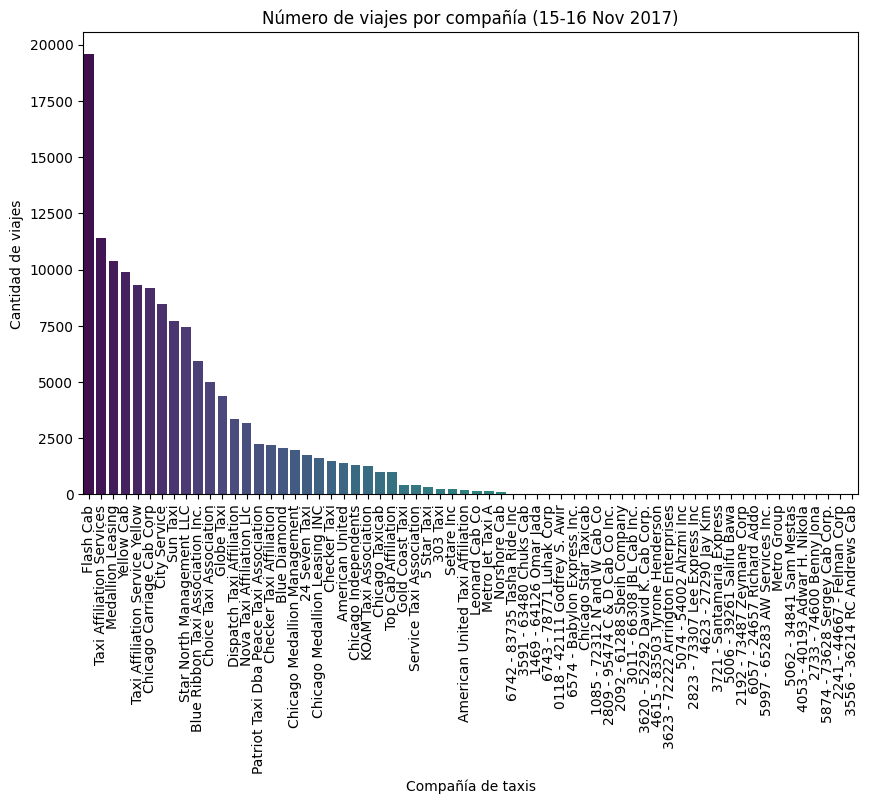

In [5]:
# Número de viajes por compañia de taxis

plt.figure(figsize=(10,6))
sns.barplot(data=df_companies, x='company_name', y='trips_amount', palette='viridis')
plt.xticks(rotation=90)
plt.title('Número de viajes por compañía (15-16 Nov 2017)')
plt.xlabel('Compañía de taxis')
plt.ylabel('Cantidad de viajes')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

¡Muy buen trabajo con la gráfica! Observamos que Flash Cab tiene el liderazgo de cantidad de viajes, bastante más arriba que el competidor que le sigue. Esta concentración de mercado se puede dar por varios factores como cobertura, cantidad de vehículos o buenas estrategias comerciales.

</div>

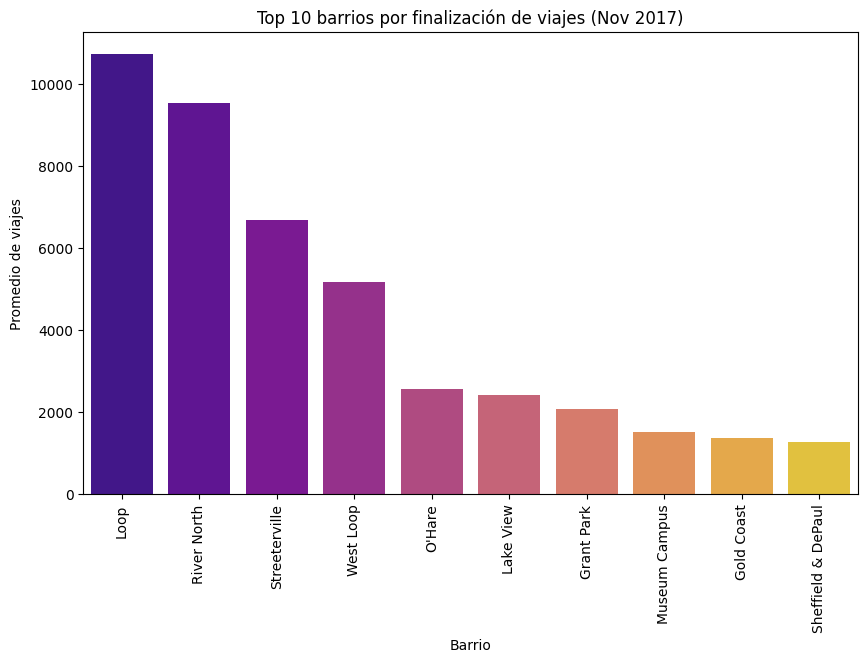

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(data=top10_neighborhoods, x='dropoff_location_name', y='average_trips', palette='plasma')
plt.xticks(rotation=90)
plt.title('Top 10 barrios por finalización de viajes (Nov 2017)')
plt.xlabel('Barrio')
plt.ylabel('Promedio de viajes')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

¡Buen trabajo obteniendo el top de barrios! El gráfico está ordenado de mayor a menor y con colores contrastantes, lo que permite notar correctamente que Loop Y River North son los principales destinos. Tal vez tienen atractivos importantes que los hacen lugares de muchas visitas.

</div>

### CONCLUSIÓN ESPERADA


- Empresas de taxis: normalmente se observa que Taxi Affiliation Services y Flash Cab concentran la mayoría de viajes, mostrando un mercado con alta concentración.

- Barrios: el Loop y el área de O’Hare suelen aparecer entre los top, lo que indica mucha demanda en el centro de la ciudad y hacia el aeropuerto

## Prueba de hipótesis

In [7]:
from scipy import stats

df_loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')
print(df_loop_ohare.head())
print(df_loop_ohare['weather_conditions'].value_counts())

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
Good    888
Bad     180
Name: weather_conditions, dtype: int64


In [8]:
# Filtramos solo los días sábados

df_loop_ohare['start_ts'] = pd.to_datetime(df_loop_ohare['start_ts'])
df_loop_ohare['day_of_week'] = df_loop_ohare['start_ts'].dt.dayofweek  # 5 = sábado

saturdays = df_loop_ohare[df_loop_ohare['day_of_week'] == 5]

# Separar por condiciones climáticas
rainy = saturdays[saturdays['weather_conditions'] == 'Bad']['duration_seconds']
clear = saturdays[saturdays['weather_conditions'] == 'Good']['duration_seconds']

In [9]:
# Prueba estadistica

alpha = 0.05

results = stats.ttest_ind(rainy, clear, equal_var=False)  # Welch's t-test
print(results)

if results.pvalue < alpha:
    print("Rechazamos H₀: sí hay diferencia en la duración promedio.")
else:
    print("No hay evidencia suficiente para rechazar H₀: la duración promedio no cambia.")

Ttest_indResult(statistic=7.186034288068629, pvalue=6.738994326108734e-12)
Rechazamos H₀: sí hay diferencia en la duración promedio.


#### Usamos t-test para muestras independientes porque queremos comparar dos medias.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho con el test de hipótesis, fue realizado de forma correcta. 

Es importante mencionar que el t-test asume que las dos muestras tienen varianzas iguales. Para verificar esa igualdad de varianzas podemos usar el **test de Levene**. Este nos dice si la variabilidad entre los grupos es estadísticamente diferente. En corto, el flujo sería así

1. Usamos `levene()` para verificar si las varianzas son iguales.
2. Dependiendo del resultado, usamos `ttest_ind()` con el argumento `equal_var`:
   - `equal_var=True` si Levene dice que las varianzas son iguales (p > 0.05).
   - `equal_var=False` si Levene dice que las varianzas son diferentes (p < 0.05).





</div>

### CONCLUSIONES ESPERADAS

- Si el p-valor es bajo (< 0.05), significa que los sábados lluviosos sí afectan la duración de los viajes → probablemente más tráfico, demoras, etc.

- Si el p-valor es alto, significa que no hay diferencia significativa → los tiempos de viaje son similares.